![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [56]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [57]:
dataSet = penguins_df.copy()
dataSet = dataSet.drop('sex',axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(dataSet)
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

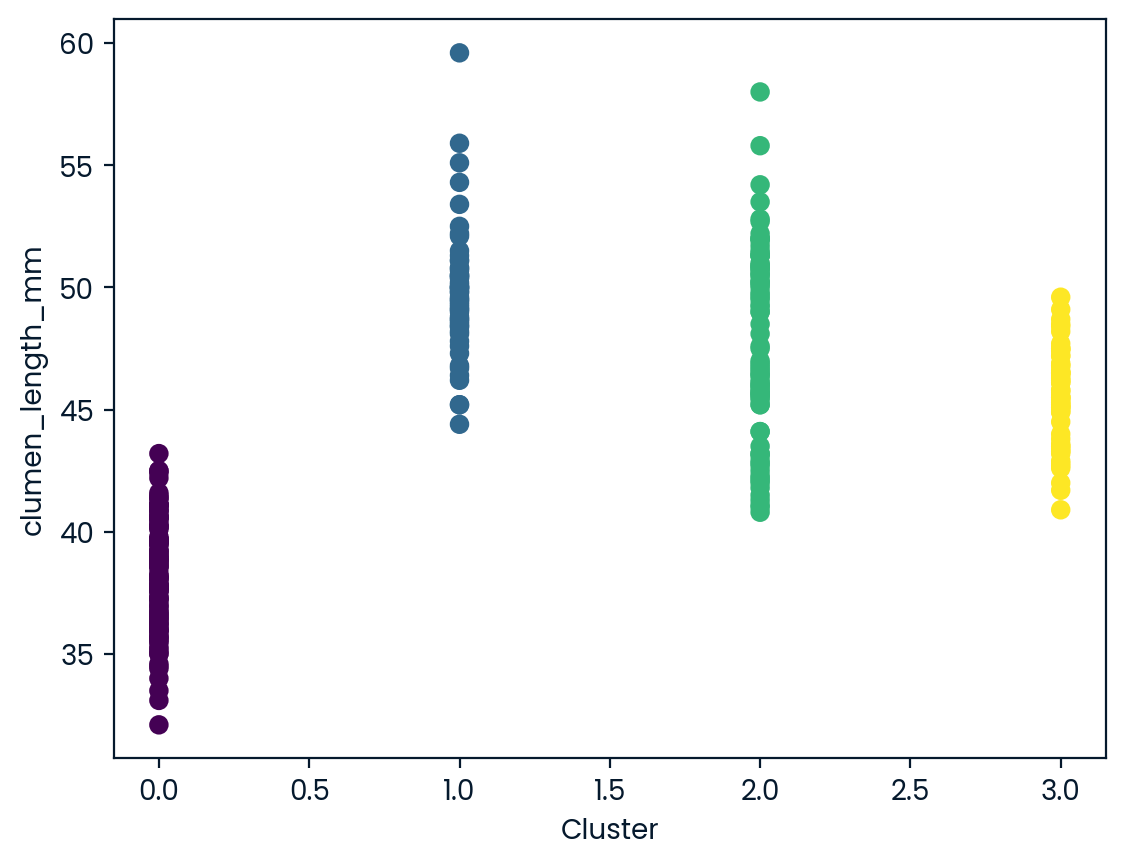

In [58]:
penguins_df['labels']=model.labels_
plt.scatter(penguins_df['labels'],penguins_df['culmen_length_mm'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('clumen_length_mm')
plt.show()

In [59]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','labels']
stat_penguins = penguins_df[numeric_columns].groupby('labels').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
labels,,,
0,38.305469,18.098437,188.554688
1,49.792982,15.738596,221.912281
2,47.662353,18.748235,196.917647
3,45.522581,14.314516,212.935484
